### Importing Necessary Libraries for Data Preparation

In [1]:
######################################################################################################################
#                               Import Python Files for Sentence & Annotations Extraction                            #
#                                        Provided as a Simple API on Github                                          #
#                                https://github.com/BryanPlummer/flickr30k_entities                                  #
######################################################################################################################

import Utils.flickr30k_entities_utils
from Utils.flickr30k_entities_utils import get_sentence_data, get_annotations

import Utils.helper_functions
from Utils.helper_functions import *

import random 
import seaborn as sb



# Uncomment the below line once in order for the code to run smoothly
# !pip install imagesize



### Driver Functions

In [2]:
######################################################################################################################
#                                                                                                                    #
#                                                   Mapping Function                                                 #
#                                                                                                                    #
######################################################################################################################
"""
Mapping Function does the following,
    - takes list of Image names as i/p and fetch Sentences & Annotations (contains bounding boxes)of all those Images
    - passes those Sentences & Annotations to the func Phrase_Id_to_Bbox & gets Bounding Boxes for all phrases
    in every image.
    - also, passes those Sentences & Annotations to the func Phrase_Id_to_Phrases & extracts phrases contained in all
    images.
    
    A typical look of the outputs would be:
    
        _Image_Train_Phrase_Id_to_Bbox -----> {'image_id_1' : {'Phrase_id_1' : [Bbox1, Bbox2 ... Bboxn],
                                                              'Phrase_id_2' : [Bbox1, Bbox2 ... Bboxn],
                                                              'Phrase_id_3' : [Bbox1, Bbox2 ... Bboxn],
                                                              .
                                                              .
                                                              .
                                                              'Phrase_id_n' : [Bbox1, Bbox2 ... Bboxn]}
                                                              
                                                'image_id_2' : {'Phrase_id_1' : [Bbox1, Bbox2 ... Bboxn],
                                                              'Phrase_id_2' : [Bbox1, Bbox2 ... Bboxn],
                                                              'Phrase_id_3' : [Bbox1, Bbox2 ... Bboxn],
                                                              .
                                                              .
                                                              .
                                                              'Phrase_id_n' : [Bbox1, Bbox2 ... Bboxn]}
                                                              
                                                              
                                                              
                                                              .
                                                              .
                                                              .
                                                              .
                                                              .
                                                              .
                                                              
                                                              
                                                'image_id_n' : {'Phrase_id_1' : [Bbox1, Bbox2 ... Bboxn],
                                                              'Phrase_id_2' : [Bbox1, Bbox2 ... Bboxn],
                                                              'Phrase_id_3' : [Bbox1, Bbox2 ... Bboxn],
                                                              .
                                                              .
                                                              .
                                                              'Phrase_id_n' : [Bbox1, Bbox2 ... Bboxn]}
                                                              
                                                              }
                                                              
                                                              
        _Image_Train_Phrase_Id_to_Phrase -----> {'image_id_1' : {'Phrase_id_1' : [Phrase1, Phrase2.... Phrase_n],
                                                              'Phrase_id_2' : [Phrase1, Phrase2.... Phrase_n],
                                                              'Phrase_id_3' : [Phrase1, Phrase2.... Phrase_n],
                                                              .
                                                              .
                                                              .
                                                              'Phrase_id_n' : [Phrase1, Phrase2.... Phrase_n]}
                                                              
                                                'image_id_2' : {'Phrase_id_1' : [Phrase1, Phrase2.... Phrase_n],
                                                              'Phrase_id_2' : [Phrase1, Phrase2.... Phrase_n],
                                                              'Phrase_id_3' : [Phrase1, Phrase2.... Phrase_n],
                                                              .
                                                              .
                                                              .
                                                              'Phrase_id_n' : [Phrase1, Phrase2.... Phrase_n]}
                                                              
                                                              
                                                              
                                                              .
                                                              .
                                                              .
                                                              .
                                                              .
                                                              .
                                                              
                                                              
                                                'image_id_n' : {'Phrase_id_1' : [Phrase1, Phrase2.... Phrase_n],
                                                              'Phrase_id_2' : [Phrase1, Phrase2.... Phrase_n],
                                                              'Phrase_id_3' : [Phrase1, Phrase2.... Phrase_n],
                                                              .
                                                              .
                                                              .
                                                              'Phrase_id_n' : [Phrase1, Phrase2.... Phrase_n]}
                                                              
                                                              }
        

NOTE: Please alter any folder paths for Images, Sentences and Annotations (Phrase & Bounding Boxes) in Helper Function File


"""



from collections import defaultdict
def Mapping(_Image_Names, _paths_dict):
    _Phrase_Id_to_Bbox = defaultdict()
    _Phrase_Id_to_Phrase = defaultdict()

    for _img in tqdm(_Image_Names):
        _img_sentences_path, _img_annotations_path, _img_absolute_path = get_Paths(_img, _paths_dict)
        sents = get_sentence_data(_img_sentences_path)
        anns = get_annotations(_img_annotations_path)
        _Phrase_Id_to_Bbox[_img] = phrase_Id_to_Bbox(sents, anns)
        _Phrase_Id_to_Phrase[_img] = phrase_Id_to_Phrases(sents, anns)
        
        
    return _Phrase_Id_to_Bbox, _Phrase_Id_to_Phrase




### Driver Code

In [3]:
_paths_dict = {
                '_sentences_path' : 'Data/annotations/Sentences',
                '_annotations_path' : 'Data/annotations/Annotations',
                '_image_folder_path' : 'Data/flickr30k-images'
                }
_train_len = 1000 #len(_trainimg)



In [4]:
"""
######################################################################################################################
#                                                                                                                    #
#                       Enter path for train, val & test split in their respective variables                         #
#                                                                                                                    #
######################################################################################################################


train.txt, val.txt and test.txt are text files that contains predefined splits, i.e each file contains the split it
belongs to.

train.txt contains all image names as strings, that should be used for training
val.txt contains all image names as strings, that should be used for validation
test.txt contains all image names as strings, that should be used for testing

"""

_trainimg = load_Splits('Data/Splits/train.txt')
_vlimg = load_Splits('Data/Splits/val.txt')
_tsimg = load_Splits('Data/Splits/test.txt')


In [5]:
"""
######################################################################################################################
#                                                                                                                    #
#                                                 Call to the Mapping Functions                                      #
#                                                                                                                    #
######################################################################################################################
"""


_Image_Train_Phrase_Id_to_Bbox, _Image_Train_Phrase_Id_to_Phrase = Mapping(_trainimg[:_train_len], _paths_dict)
_Image_Val_Phrase_Id_to_Bbox, _Image_Val_Phrase_Id_to_Phrase = Mapping(_vlimg, _paths_dict)
_Image_Test_Phrase_Id_to_Bbox, _Image_Test_Phrase_Id_to_Phrase = Mapping(_tsimg, _paths_dict)



  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [6]:
import pandas as pd
def prepare_DataFrame(Phrase_Dict, Bbox_Dict):
    Final_DF = pd.DataFrame()
    for Image_Id in tqdm(Phrase_Dict.keys()):
        
        Phrase_DF = pd.DataFrame.from_dict(Phrase_Dict[Image_Id], orient = 'index')
        Phrase_DF = pd.DataFrame(Phrase_DF.stack(level=0)).reset_index().drop('level_1', axis = 1)

        Bbox_DF = pd.DataFrame.from_dict(Bbox_Dict[Image_Id], orient = 'index')
        Bbox_DF = pd.DataFrame(Bbox_DF.stack(level=0)).reset_index().drop('level_1', axis = 1)
        Bbox_DF = Bbox_DF.groupby(['level_0'])[0].apply(list)
        

        Merged_DF = pd.merge(Phrase_DF, Bbox_DF, on = 'level_0', how='inner')
        Merged_DF['Image_Id'] = Image_Id

        Final_DF = pd.concat([Final_DF, Merged_DF], axis = 0)

    Final_DF = Final_DF.rename(columns = {'level_0' : 'Phrase_Id', '0_x': 'Phrase', '0_y':'Bounding_Box'})
    Final_DF = Final_DF[['Image_Id', 'Phrase_Id', 'Phrase', 'Bounding_Box']]
    Final_DF.reset_index(drop = True, inplace = True)
    
    return Final_DF



"""***************************************************************************************************************"""


'***************************************************************************************************************'

In [23]:
for k in _Image_Test_Phrase_Id_to_Phrase.keys():
    Phrase_DF = pd.DataFrame.from_dict(_Image_Test_Phrase_Id_to_Phrase[k], orient = 'index')
    Phrase_DF = pd.DataFrame(Phrase_DF.stack(level=0)).reset_index().drop('level_1', axis = 1)
#     print(Phrase_DF)
    
    Bbox_DF = pd.DataFrame.from_dict(_Image_Test_Phrase_Id_to_Bbox[k], orient = 'index')
    Bbox_DF = pd.DataFrame(Bbox_DF.stack(level=0)).reset_index().drop('level_1', axis = 1)
    Bbox_DF = Bbox_DF.groupby(['level_0'])[0].apply(list)
    
#     print(Bbox_DF)
    
    Merged_DF = pd.merge(Phrase_DF, Bbox_DF, on = 'level_0', how='left')
#     print(Merged_DF)
#     print(k)
    break
    
Merged_DF    

level_0                      0_x  \
0      547  A collage of one person   
1      547         Several climbers   
2      547        A group of people   
3      547           Seven climbers   
4      554                    a row   
5      548                   a rock   
6      548                  a cliff   
7      548     a rock climbing wall   
8      548              a rock face   
9      548                 the rock   
10     549                  the man   
11     549                  one man   
12     549              another man   
13     550                      red   
14     551                 the line   
15     551                 the rope   

                                                  0_y  
0   [[193, 369, 230, 453], [207, 303, 255, 383], [...  
1   [[193, 369, 230, 453], [207, 303, 255, 383], [...  
2   [[193, 369, 230, 453], [207, 303, 255, 383], [...  
3   [[193, 369, 230, 453], [207, 303, 255, 383], [...  
4                                                 NaN  
5                                 [[0, 53, 332, 499]]  
6                                 [[0, 53, 332, 499]]  
7                                 [[0, 53, 332, 499]]  
8                                 [[0, 53, 332, 499]]  
9                                 [[0, 53, 332, 499]]  
10                              [[73, 301, 180, 499]]  
11                              [[73, 301, 180, 499]]  
12                              [[73, 301, 180, 499]]  
13         [[79, 377, 141, 434], [74, 326, 124, 381]]  
14                              [[118, 80, 187, 487]]  
15                              [[118, 80, 187, 487]]

In [7]:
_Image_Val_Phrase_Id_to_Phrase['100652400']

{'197': {'A construction worker', 'A man'},
 '198': {'a blue hard hat', 'a hard hat', 'hard hat'},
 '199': {'a caution vest',
  'a reflective vest',
  'bright vest',
  'orange safety vest'},
 '200': {'a street corner', 'an intersection', 'the road', 'the street'},
 '201': {'a flag', 'a red flag', 'an orange flag'},
 '202': {'spray paint'}}

In [8]:
_Image_Val_Phrase_Id_to_Bbox['100652400']

{'197': [[52, 44, 109, 202]],
 '198': [[58, 43, 87, 65]],
 '199': [[61, 68, 97, 118]],
 '200': [[0, 89, 373, 499]],
 '201': [[92, 139, 159, 183]],
 '202': [[320, 146, 374, 206],
  [103, 173, 225, 249],
  [2, 247, 132, 279],
  [1, 300, 66, 379],
  [86, 236, 374, 446],
  [240, 194, 290, 227],
  [20, 187, 87, 239],
  [177, 279, 277, 325]]}

In [9]:
"""
######################################################################################################################
#                                                                                                                    #
#                                                Converting to DataFrames.                                           #
#                                                                                                                    #
######################################################################################################################
"""



# _Fractional_Train_Set_Pid_to_P = {img : _Image_Train_Phrase_Id_to_Phrase[img] for img in _trainimg[:_train_len]}
# _Fractional_Train_Set_Pid_to_B = {img : _Image_Train_Phrase_Id_to_Bbox[img] for img in _trainimg[:_train_len]}


Test_Frame = prepare_DataFrame(_Image_Test_Phrase_Id_to_Phrase, _Image_Test_Phrase_Id_to_Bbox)
Val_Frame = prepare_DataFrame(_Image_Val_Phrase_Id_to_Phrase, _Image_Val_Phrase_Id_to_Bbox)
Train_Frame = prepare_DataFrame(_Image_Train_Phrase_Id_to_Phrase, _Image_Train_Phrase_Id_to_Bbox)




  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
Train_Frame.Phrase = Train_Frame.Phrase.str.lower()
Val_Frame.Phrase = Val_Frame.Phrase.str.lower()
Train_Frame.Phrase = Train_Frame.Phrase.str.lower()


unique_Phrases_Train = list(Train_Frame.Phrase.unique())
_train_Phrase_to_Index_Map = dict(zip(unique_Phrases_Train, range(len(unique_Phrases_Train))))

unique_Phrases_Val = list(Val_Frame.Phrase.unique())
_val_Phrase_to_Index_Map = dict(zip(unique_Phrases_Val, range(len(unique_Phrases_Val))))

unique_Phrases_Test = list(Test_Frame.Phrase.unique())
_val_Phrase_to_Index_Map = dict(zip(unique_Phrases_Test, range(len(unique_Phrases_Test))))

In [ ]:
Train_Frame.drop_duplicates(subset = ['Image_Id', 'Phrase_Id', 'x_min', 'y_min','x_max','y_max'])

sample = Train_Frame.drop('Bounding_Box', axis=1)[Train_Frame[['Image_Id', 'Phrase_Id', 'x_min', 'y_min','x_max','y_max']].duplicated()==True]

In [10]:

"""
######################################################################################################################
#                                                                                                                    #
#                                        Fetch and Analyze all Image Sizes                                           #
#                                              IRREGULAR SIZES                                                       #
#                                                                                                                    #
######################################################################################################################
"""
_all_images = _trainimg + _vlimg + _tsimg
aspects = get_Image_Sizes(_all_images, _paths_dict)


  0%|          | 0/31783 [00:00<?, ?it/s]

In [12]:
Test_Frame

Image_Id Phrase_Id                   Phrase  \
0      1016887272       547         Several climbers   
1      1016887272       547           Seven climbers   
2      1016887272       547        A group of people   
3      1016887272       547  A collage of one person   
4      1016887272       548                   a rock   
...           ...       ...                      ...   
11673  1015118661       485                      man   
11674  1015118661       488                 overalls   
11675  1015118661       486               the street   
11676  1015118661       486     a stone paved street   
11677  1015118661       490             a metal pole   

                                            Bounding_Box  
0      [[193, 369, 230, 453], [207, 303, 255, 383], [...  
1      [[193, 369, 230, 453], [207, 303, 255, 383], [...  
2      [[193, 369, 230, 453], [207, 303, 255, 383], [...  
3      [[193, 369, 230, 453], [207, 303, 255, 383], [...  
4                                    [[0, 53, 332, 499]]  
...                                                  ...  
11673                               [[172, 0, 336, 263]]  
11674                               [[165, 0, 342, 263]]  
11675                               [[0, 273, 499, 373]]  
11676                               [[0, 273, 499, 373]]  
11677                               [[342, 0, 442, 287]]  

[11678 rows x 4 columns]

In [111]:

"""
######################################################################################################################
#                                                                                                                    #
#                              Demnostrating Phrase & Boxes by picking a Random Image                                #
#                                                 SINGLE PATCH                                                       #
#                                                                                                                    #
######################################################################################################################
"""


# rw = Test_Frame.sample().reset_index()
plot_patches(rw['Image_Id'].at[0], rw['Bounding_Box'].at[0][0], rw['Phrase'].at[0], _paths_dict, _Single_Patch = True)



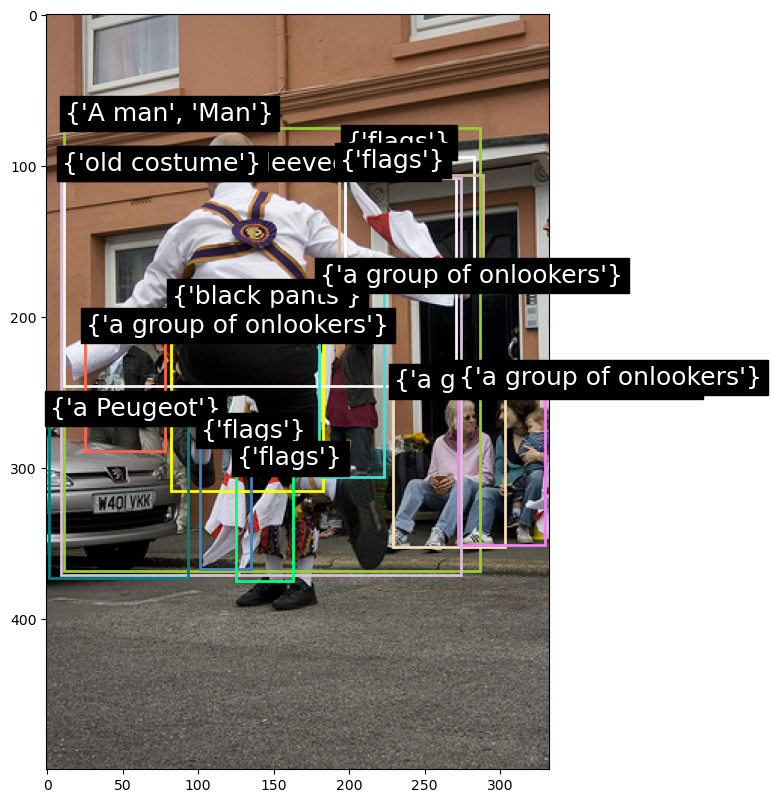

In [24]:

"""
######################################################################################################################
#                                                                                                                    #
#                              Demnostrating Phrase & Boxes by picking a Random Image                                #
#                                                    ALL PATCHES                                                     #
#                                                                                                                    #
######################################################################################################################
"""


im = random.choice(_tsimg)
plot_patches(_Image_id = im, _Bboxes = _Image_Test_Phrase_Id_to_Bbox, _Phrs = _Image_Test_Phrase_Id_to_Phrase, _paths= _paths_dict)




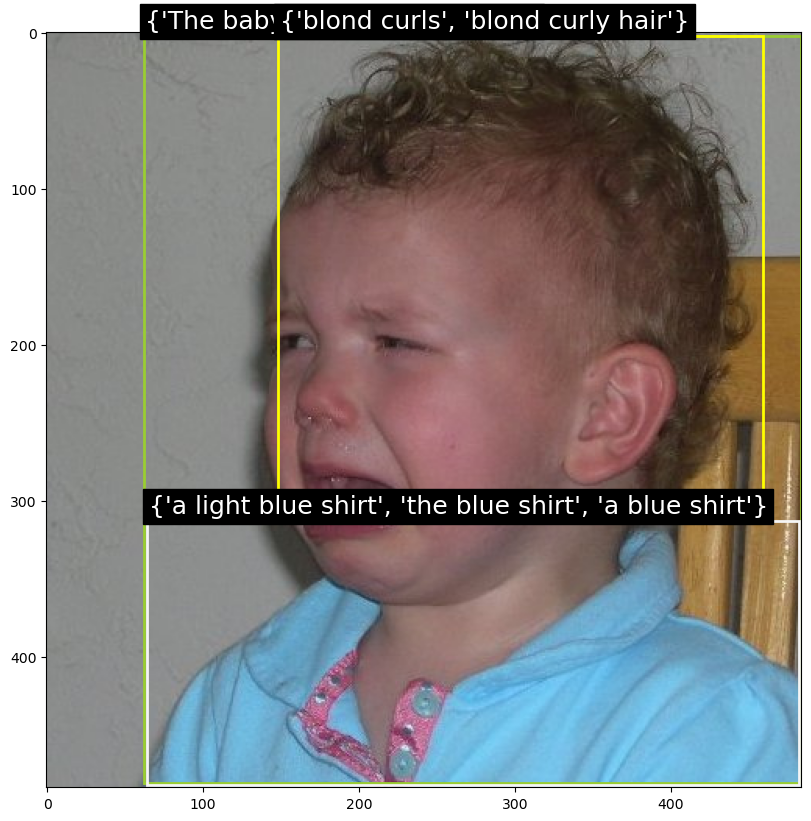

In [26]:

"""
######################################################################################################################
#                                                                                                                    #
#                              Demnostrating Phrase & Boxes by picking a Random Image                                #
#                                                    ALL PATCHES                                                     #
#                                                                                                                    #
######################################################################################################################
"""


im = random.choice(_tsimg)
plot_patches(_Image_id = im, _Bboxes = _Image_Test_Phrase_Id_to_Bbox, _Phrs = _Image_Test_Phrase_Id_to_Phrase, _paths= _paths_dict)




In [98]:

"""
######################################################################################################################
#                                                                                                                    #
#                              Demnostrating Phrase & Boxes by picking a Random Image                                #
#                                                    ALL PATCHES                                                     #
#                                                                                                                    #
######################################################################################################################
"""


im = random.choice(_tsimg)
plot_patches(_Image_id = im, _Bboxes = _Image_Test_Phrase_Id_to_Bbox, _Phrs = _Image_Test_Phrase_Id_to_Phrase, _paths= _paths_dict)




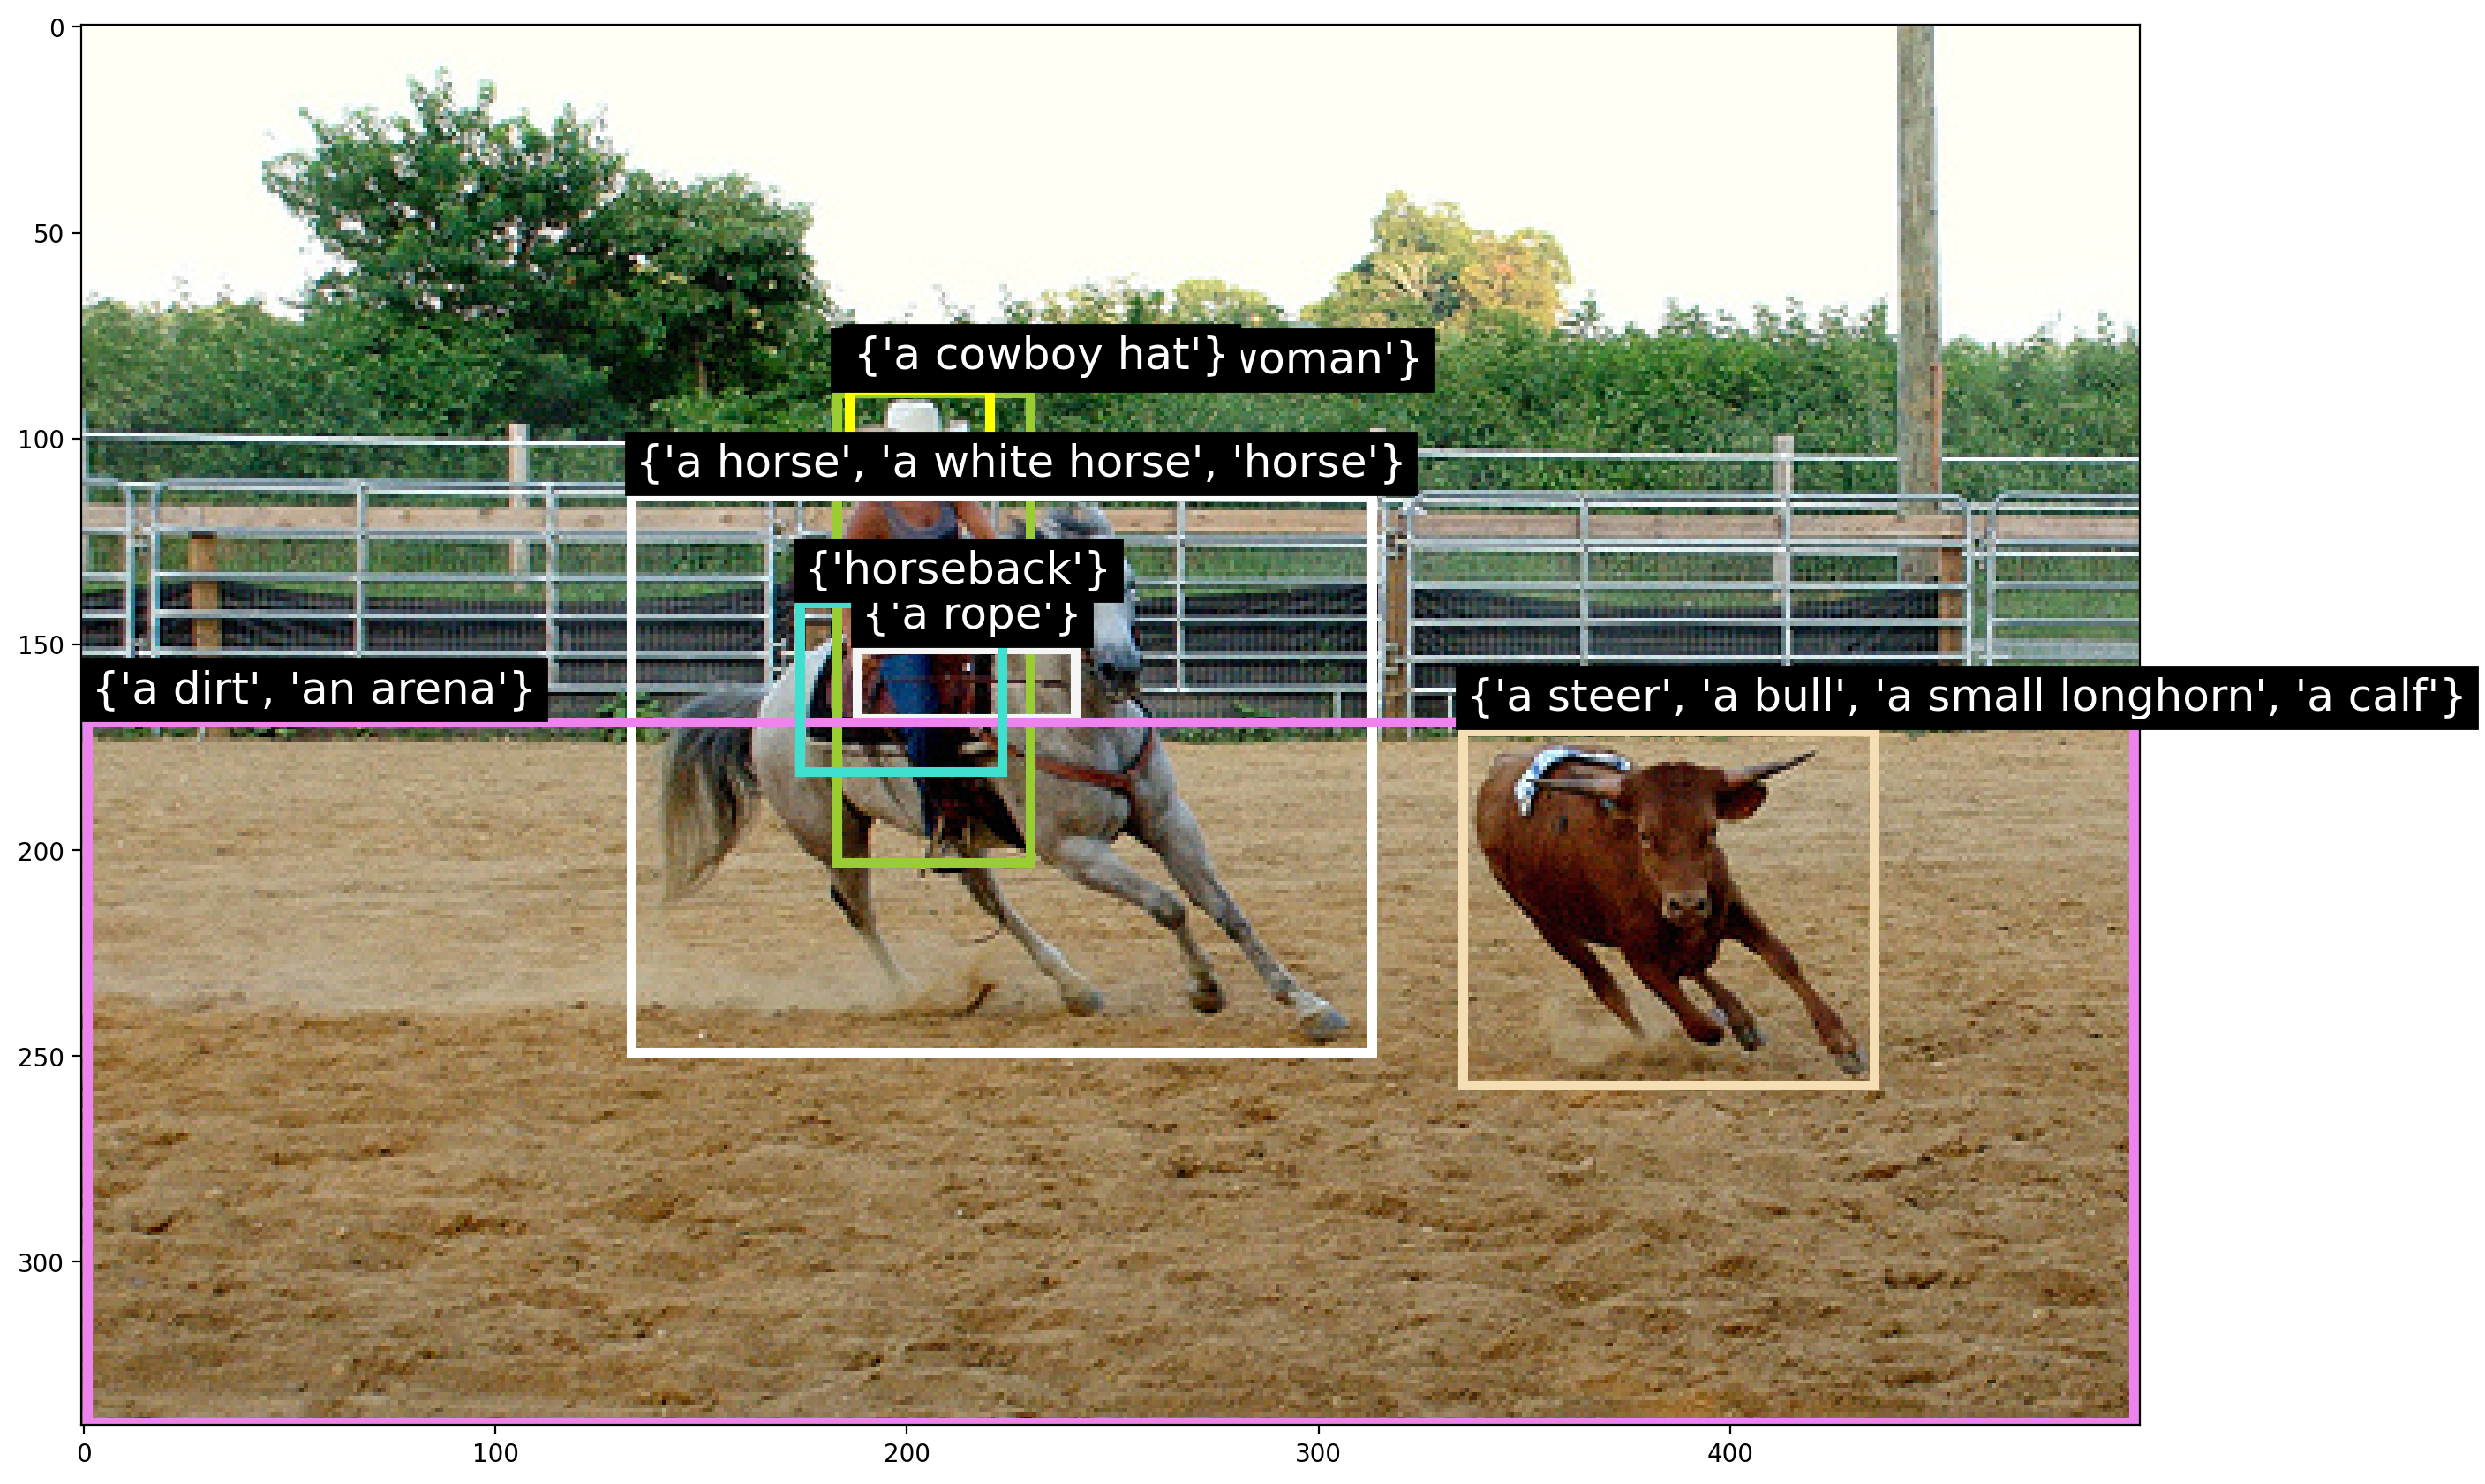

In [203]:

######################################################################################################################
#                                                                                                                    #
#                                            Plot the Patches of the Phrases                                         #
#                                                                                                                    #
######################################################################################################################

from tqdm import tqdm
from PIL import Image
import numpy as np


import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.patches as patches # for bounding boxes
import matplotlib.colors as mcolors
plt.rcParams['figure.figsize'] = (25,15)
mpl.rcParams['figure.dpi'] = 200

def plot_patches(_Image_id, _Bboxes, _Phrs, _paths, _OnlyBbox = False, _Single_Patch = False, _COLORS = mcolors.CSS4_COLORS):
    
    
    """
    Fetch the Image
    """
    _,_,_img_path = get_Paths(_Image_id, _paths)
    _Image = Image.open(_img_path)
    fig, ax = plt.subplots()
    _COLORS = list(_COLORS.keys())
    
    """
    _Blank is just when you want the bounding box and not the image in the background.
    """
    _Blank = np.ones((_Image.height, _Image.width), dtype=float)
    _Blank.fill(255)
    
    
    if _Single_Patch:
        color = _COLORS.pop()
        x = float(_Bboxes[0])
        y = float(_Bboxes[1])
        w = float(_Bboxes[2]) - x
        h = float(_Bboxes[3]) - y

        plt.text(x+1, y-5, _Phrs, fontdict = {'fontsize':8.0, 'fontweight':'medium', 'color':'white', 'backgroundcolor': 'black'})
        bb = patches.Rectangle((x,y), w, h, linewidth = 4, edgecolor = color, facecolor = 'None')
        ax.add_patch(bb)
        ax.imshow(_Image)
        
        
    else:
    
        """
        Get the bounding Boxes & Phrases for that
        """
        BoundingBoxes = _Bboxes[_Image_id]
        Phrases = _Phrs[_Image_id]

        for phrase_id, phrases in Phrases.items():
            if phrase_id not in list(BoundingBoxes.keys()):
                continue
            bboxes = BoundingBoxes[phrase_id]
            name = str(phrases)
            for _Bbox in bboxes:

                color = _COLORS.pop()
                """
                [ x_min, y_min, x_max, y_max ] -----> [ _Bbox[0], _Bbox[1], _Bbox[2], _Bbox[3] ]
                """
                x = float(_Bbox[0])
                y = float(_Bbox[1])
                w = float(_Bbox[2]) - x
                h = float(_Bbox[3]) - y

                if not _OnlyBbox:
                    plt.text(x+1, y-5, name, fontdict = {'fontsize':18.0, 'fontweight':'medium', 'color':'white', 'backgroundcolor': 'black'})
                bb = patches.Rectangle((x,y), w, h, linewidth = 4, edgecolor = color, facecolor = 'None')
                ax.add_patch(bb)


        if _OnlyBbox: 
            ax.imshow(_Blank, cmap= 'gray',vmin= 0,vmax= 1)
        else:
            ax.imshow(_Image)
    
    fig.set_size_inches(18.5, 10.5)
    plt.show()
    
"""***************************************************************************************************************"""







"""
######################################################################################################################
#                                                                                                                    #
#                              Demnostrating Phrase & Boxes by picking a Random Image                                #
#                                                    ALL PATCHES                                                     #
#                                                                                                                    #
######################################################################################################################
"""


im = random.choice(_tsimg)
plot_patches(_Image_id = im, _Bboxes = _Image_Test_Phrase_Id_to_Bbox, _Phrs = _Image_Test_Phrase_Id_to_Phrase, _paths= _paths_dict)




In [29]:
"""
######################################################################################################################
#                                                                                                                    #
#               Demnostration Purpose as to What do extracted files look like from GIT Programs                      #
#                                                                                                                    #
######################################################################################################################
"""

im = random.choice(_trainimg)
_img_sentences_path, _img_annotations_path, _img_absolute_path = get_Paths(im, _paths_dict)
sents = get_sentence_data(_img_sentences_path)
anns = get_annotations(_img_annotations_path)





In [33]:
sents[0]

{'sentence': 'A group of tourists take in the sites in a large city as a taxi unloads its fare .',
 'phrases': [{'first_word_index': 0,
   'phrase': 'A group of tourists',
   'phrase_id': '211360',
   'phrase_type': ['people']},
  {'first_word_index': 6,
   'phrase': 'the sites',
   'phrase_id': '211363',
   'phrase_type': ['scene']},
  {'first_word_index': 9,
   'phrase': 'a large city',
   'phrase_id': '211364',
   'phrase_type': ['scene']},
  {'first_word_index': 13,
   'phrase': 'a taxi',
   'phrase_id': '211361',
   'phrase_type': ['vehicles']},
  {'first_word_index': 16,
   'phrase': 'its fare',
   'phrase_id': '211362',
   'phrase_type': ['other']}]}